In [3]:
import numpy as np
import sklearn as sk
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from preprocess import preprocessing_data


df_consumption = preprocessing_data() # read data

col_list = [col for col in df_consumption.columns] #read col names in a list
del col_list[0:2]
print(col_list)

['week_1', 'week_10', 'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_2', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_3', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_4', 'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49', 'week_5', 'week_50', 'week_51', 'week_52', 'week_53', 'week_6', 'week_7', 'week_8', 'week_9']


In [71]:
df_consumption[df_consumption['CHK_STATE'] == 1]
df2 = df_consumption[col_list]


In [72]:
def apply_isolation_forest(df, n_estimators, contamination =0.01):
    """ apply isolation forest to a given data set and return the anomaly score of the data"""
    clf = IsolationForest(n_estimators= n_estimators,
                          max_samples= 'auto',
                          contamination= contamination,
                          max_features=4,
                          bootstrap= False,
                          n_jobs=1,
                          random_state=42,
                          verbose = 0)
    clf.fit(df)
    pred = clf.predict(df.values)
    scores = clf.decision_function(df.values)
    return  clf, pred, scores
    
   # determine the number of trees 
    X = df_consumption[col_list].copy()
    if X.shape[0] < 500:
        n_estimators = len(col_list) * 4 + X.shape[0] * 2
    else:
        n_estimators = 100
        
print('number of trees', n_estimators)

number of trees 19310


In [73]:
clf, pred, scores = apply_isolation_forest(df2, n_estimators = n_estimators, contamination= 0.01)
df_consumption['anomaly'] = pred
df_consumption['scores'] = scores
df_consumption['outlier'] =  np.where(df_consumption['anomaly'] == -1, 'yes', 'no')
df_consumption[(df_consumption['anomaly']) == -1 ]

week,CONS_NO,CHK_STATE,week_1,week_10,week_11,week_12,week_13,week_14,week_15,week_16,...,week_50,week_51,week_52,week_53,week_6,week_7,week_8,week_9,anomaly,scores
9,7036735,1,229.3200,222.587143,292.648571,262.142857,266.044286,181.417143,258.220000,205.252857,...,578.134286,449.221429,554.767143,507.5800,177.040000,92.911429,54.744286,60.554286,-1,-0.124381
39,33630435,1,59.8225,107.748571,109.968571,103.217143,105.037143,113.432857,97.794286,104.812857,...,114.461429,113.038571,110.040000,135.6750,90.977143,52.361429,17.088571,25.802857,-1,-0.083953
210,220036635,1,185.4575,148.774286,163.660000,147.242857,156.554286,147.812857,152.291429,142.815714,...,161.488571,175.852857,175.635714,175.1425,160.448571,144.268571,114.020000,117.951429,-1,-0.108800
259,263770557,0,60.5775,68.737143,69.205714,77.152857,72.461429,82.141429,72.711429,72.832857,...,70.291429,69.091429,71.552857,69.7675,61.907143,68.668571,71.312857,69.692857,-1,-0.046741
285,292928250,1,1.7475,1.685714,2.308571,-72.019286,162.795714,153.819286,170.801429,157.011429,...,158.882143,174.123571,176.734286,175.6300,1.797143,1.691429,0.680000,1.570000,-1,-0.079243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9177,9601410557,1,74.0700,91.250000,88.041429,71.750000,65.162857,85.722857,65.750000,61.024286,...,39.847143,41.215714,35.367143,39.9275,79.362857,79.885714,68.792857,80.932857,-1,-0.041293
9232,9667460250,1,168.4975,177.802857,296.458571,322.120000,199.495714,363.177143,280.418571,322.645714,...,82.821429,83.017143,80.312857,76.6750,303.715714,331.557143,85.044286,137.968571,-1,-0.115582
9432,9868137457,1,50.7350,150.507143,144.224286,83.255714,152.912857,61.490000,120.861429,90.751429,...,104.062857,116.638571,122.252857,103.3125,103.167143,143.300000,133.894286,115.852857,-1,-0.015558
9452,9895730357,1,19.0575,24.440000,22.507143,32.364286,22.274286,70.287143,30.892857,36.214286,...,0.008571,0.014286,0.000000,0.1400,31.682857,29.798393,43.068750,48.032857,-1,-0.004284


In [74]:
#df_outlier = df_consumption.loc[(df_consumption['anomaly']) == -1]
#df_outlier.to_csv('/Users/apple/Downloads/data/df_outlier.csv')

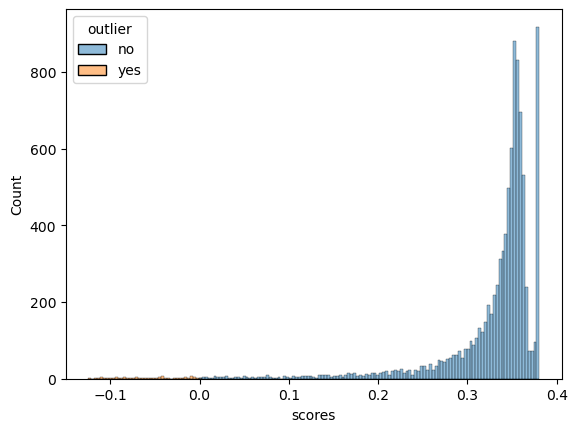

In [80]:
sns.histplot(data =  df_consumption,  x = 'scores', hue= 'outlier')
plt.show()

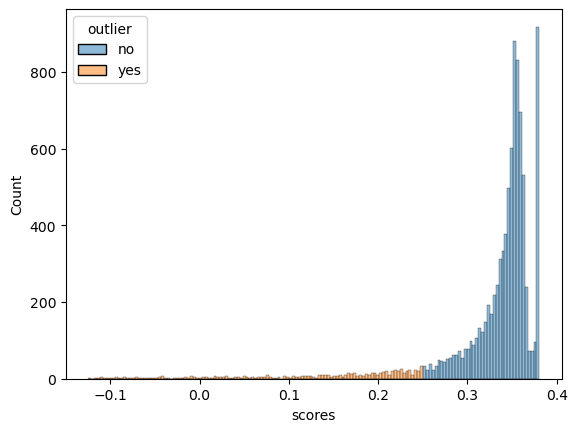

In [89]:
sns.histplot(data =  df_consumption,  x = 'scores', hue= 'outlier')
plt.show()

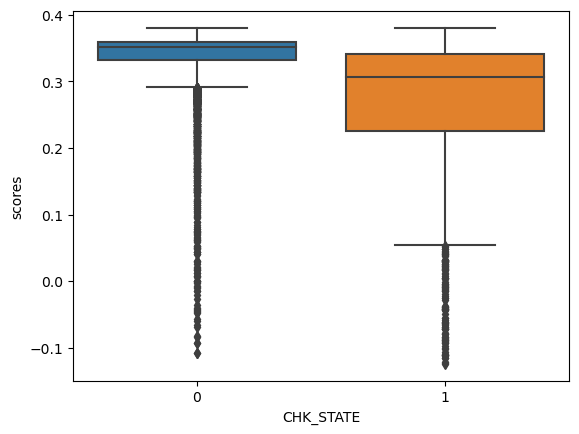

In [91]:
sns.boxplot(data= df_consumption, y= 'scores', x= 'CHK_STATE')
plt.show()

In [85]:
# select outliers based on scores
df_consumption['outlier'] =  np.where(df_consumption['scores'] < 0.25, 'yes', 'no')

In [87]:
df_outlier = df_consumption.loc[(df_consumption['outlier']) == 'yes']
df_outlier.to_csv('/Users/apple/Downloads/data/df_outlier.csv')

In [88]:
df_consumption.loc[(df_consumption['outlier']) == 'yes']

week,CONS_NO,CHK_STATE,week_1,week_10,week_11,week_12,week_13,week_14,week_15,week_16,...,week_51,week_52,week_53,week_6,week_7,week_8,week_9,anomaly,scores,outlier
8,7009951,1,28.1725,0.000000,0.000000,10.405714,25.931429,18.797143,27.185714,18.804286,...,0.000000,0.000000,0.0000,30.021429,19.110000,0.000000,0.000000,1,0.140898,yes
9,7036735,1,229.3200,222.587143,292.648571,262.142857,266.044286,181.417143,258.220000,205.252857,...,449.221429,554.767143,507.5800,177.040000,92.911429,54.744286,60.554286,-1,-0.124381,yes
17,11903141,0,7.1725,19.770000,21.834286,26.207143,26.585714,22.660000,23.507143,21.047143,...,18.184286,23.878571,21.0375,7.182857,11.687143,21.614286,15.941429,1,0.176960,yes
23,17069541,0,32.9750,32.032857,32.055714,31.831429,31.671429,32.672857,32.392857,30.237143,...,15.684286,15.682857,15.6250,31.970000,31.177143,33.715714,31.927143,1,0.176808,yes
39,33630435,1,59.8225,107.748571,109.968571,103.217143,105.037143,113.432857,97.794286,104.812857,...,113.038571,110.040000,135.6750,90.977143,52.361429,17.088571,25.802857,-1,-0.083953,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9468,9907989541,0,23.1800,22.187143,21.711429,20.530000,18.012857,21.337143,16.681429,26.142857,...,20.960000,24.967143,35.0775,23.180000,24.058571,23.852857,21.134286,1,0.162046,yes
9491,9928004100,0,18.0825,17.574286,19.594286,15.121429,17.554286,15.534286,15.225714,16.850000,...,7.381429,7.915714,6.8600,23.965714,23.977143,15.278571,10.388571,1,0.249854,yes
9516,9952813300,1,24.2000,23.871429,26.721429,28.017143,27.378571,28.587143,30.698571,27.615714,...,63.392857,88.488571,96.6325,26.257143,25.500000,20.268571,21.078571,1,0.077345,yes
9518,9953641157,0,51.2175,48.238571,52.861429,46.590000,46.868571,47.741429,49.450000,47.152857,...,58.947143,58.764286,63.2625,48.151429,49.171429,50.734286,50.910000,1,0.000508,yes
